# Sugarcane Time-Since-Harvest Tool

In [3]:
# Import required modules and load tile geometries

import warnings
warnings.simplefilter("ignore")

import sys
import os
import glob
import ipywidgets as widgets

from IPython.display import Image

# Suppress ugly warning from s2cloudless
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

# Make sure local modules can be imported
module_path_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
module_path = os.path.join(module_path_root, "Satellite")
if module_path not in sys.path:
    sys.path.append(module_path)

# Import local modules
import Contrib.addressGeocode as geocode
import sentinel.geometry_list as geometry_list

# Set current directory to where "data" is, if not done already
try:
    data_path
except NameError:
    import configparser
    config = configparser.ConfigParser()
    config.read('jupyter_satellites.config')
    data_path = config.get('Jupyter_Notebooks', 'data_path')
    os.chdir(data_path)
    
# Load tile geometry data
gl = geometry_list("geometries")

# Define function to display latest TCI image for tile
def display_tile(tile_x, tile_y, date="-"):
    # Find relevant images
    snapshotFilter = os.path.join("sugarcanetiles", tile_x + "-" + tile_y + "-TCI-*.png")
    snapshotList   = glob.glob(snapshotFilter)
    latest_file = max(snapshotList)
    display(Image(latest_file))
    return latest_file

Text(value='', description='Address', layout=Layout(width='100%'))

Latitude:  148.717846464202
Longitude: -20.817399916644984
Tile: 7680, 10240


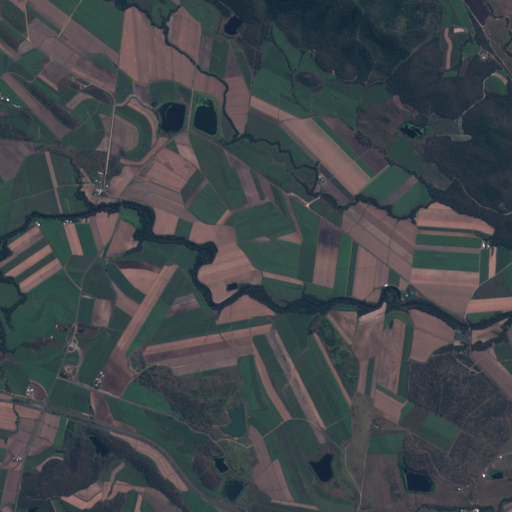

sugarcanetiles\7680-10240-TCI-2019-08-09.png


In [4]:
# Prompt for Address

# Display text box for address entry
address=widgets.Text(
    description='Address',
    layout=widgets.Layout(width='100%')
)

# Global variable to store desired location
latlong = 0

# Define how to handle address entry
def handle_geocode_submit(sender):
    global latlong
    latlong = geocode.addressGeocode(address.value)
    #print(latlong)
    tile_x, tile_y = gl.findTile(latitude=latlong['x'], longitude=latlong['y'])
    print("Tile: " + tile_x + ", " + tile_y)
    if (tile_x != 'N/A'):
        global latest_file
        latest_file = display_tile(tile_x, tile_y)
        print(latest_file)
        
address.on_submit(handle_geocode_submit)

display(address)

# Dales Rd, 4741